<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Hepatitis%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [128]:
from google.colab import drive

https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

In [129]:
hepatite=pd.read_csv('/content/HepatitisCdata.csv')

In [130]:
hepatite

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


DATA EXPLORATION

In [131]:
hepatite.drop('Unnamed: 0',axis=1, inplace=True)

In [132]:
column_names = ['Age', 'Sex', 'ALB', 'ALP' ,'ALT','AST','BIL','CHE', 'CHOL', 'CREA','GGT','PROT','Category']

In [133]:
hepatite = hepatite.reindex(columns=column_names)

In [134]:
hepatite

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3=Cirrhosis
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3=Cirrhosis
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3=Cirrhosis
613,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3=Cirrhosis


In [135]:
hepatite.isnull().sum()

Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

In [136]:
hepatite = hepatite[hepatite['CHOL'].notna()]

In [137]:
hepatite = hepatite[hepatite['ALP'].notna()]

In [138]:
hepatite = hepatite[hepatite['ALT'].notna()]

In [139]:
hepatite.isnull().sum()

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

In [140]:
print(hepatite.dtypes)

Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
Category     object
dtype: object


In [141]:
hepatite.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [142]:
correlations = hepatite.corr(method='pearson')

In [143]:
correlations

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760
ALB,-0.191094,1.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726
ALP,0.177720,-0.146120,1.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085
ALT,-0.040576,0.039497,0.221603,1.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786
AST,0.072739,-0.177609,0.067024,0.198658,1.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404
BIL,0.039655,-0.169597,0.058372,-0.106797,0.309580,1.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575
CHE,-0.075863,0.360919,0.029482,0.224344,-0.197270,-0.320713,1.000000,0.428018,-0.012120,-0.095716,0.306288
CHOL,0.124742,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,1.000000,-0.051464,0.008823,0.245050
CREA,-0.025142,0.001433,0.153909,-0.036106,-0.017948,0.019910,-0.012120,-0.051464,1.000000,0.125353,-0.030111
GGT,0.143379,-0.147598,0.461300,0.219707,0.477774,0.210567,-0.095716,0.008823,0.125353,1.000000,-0.037127


In [144]:
hepatite.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age      0.286558
ALB     -0.102228
ALP      4.756845
ALT      6.815926
AST      5.246583
BIL      8.089304
CHE     -0.067161
CHOL     0.378780
CREA    14.955189
GGT      5.936910
PROT    -1.061908
dtype: float64

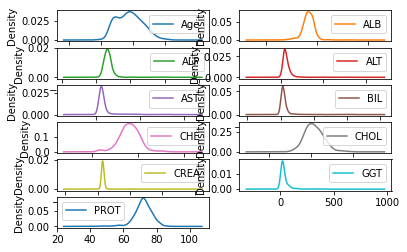

In [145]:
hepatite.plot(kind='density', subplots=True, layout=(6,2), sharex=False)
plt.show()

## **Predictors and class split**

In [146]:
X_hepatite=hepatite.iloc[:,0:12].values

In [124]:
X_hepatite

array([[32, 'm', 38.5, ..., 106.0, 12.1, 69.0],
       [32, 'm', 38.5, ..., 74.0, 15.6, 76.5],
       [32, 'm', 46.9, ..., 86.0, 33.2, 79.3],
       ...,
       [62, 'f', 32.0, ..., 55.7, 650.9, 68.5],
       [64, 'f', 24.0, ..., 63.0, 35.9, 71.3],
       [64, 'f', 29.0, ..., 66.7, 64.2, 82.0]], dtype=object)

In [147]:
Y_hepatite=hepatite.iloc[:,12].values

In [148]:
Y_hepatite

array(['0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '

In [149]:
from sklearn import preprocessing

In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
encoder=preprocessing.LabelEncoder()

In [152]:
X_hepatite[:,1]=encoder.fit_transform(X_hepatite[:,1])

In [154]:
hepatite['Category'] = hepatite['Category'].map({'0=Blood Donor':0,
                             '0s=suspect Blood Donor':4,
                             '1=Hepatitis':1,
                             '2=Fibrosis':2,
                             '3=Cirrhosis':3})

In [155]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(X_hepatite)

In [156]:
X_hepatite=data_rescaled

In [157]:
X_hepatite

array([[0.16666667, 1.        , 0.35066865, ..., 0.09149473, 0.01175743,
        0.58033573],
       [0.16666667, 1.        , 0.35066865, ..., 0.0616189 , 0.01717203,
        0.76019185],
       [0.16666667, 1.        , 0.47548291, ..., 0.07282233, 0.04439975,
        0.82733813],
       ...,
       [0.72222222, 0.        , 0.25408618, ..., 0.04453366, 1.        ,
        0.56834532],
       [0.75925926, 0.        , 0.13521545, ..., 0.05134908, 0.04857673,
        0.63549161],
       [0.75925926, 0.        , 0.20950966, ..., 0.05480347, 0.09235767,
        0.89208633]])

In [158]:
Y_hepatite

array(['0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '

## **Training base and test base**

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_hepatite_treinamento, X_hepatite_teste, Y_hepatite_treinamento, Y_hepatite_teste = train_test_split(X_hepatite, Y_hepatite, test_size = 0.25, random_state = 0)

In [162]:
import pickle

In [163]:
with open('hepatite.pkl', mode = 'wb') as f:
  pickle.dump([X_hepatite_treinamento, Y_hepatite_treinamento, X_hepatite_teste, Y_hepatite_teste], f)

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [165]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

## **Randon Forest**

In [166]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_hepatite, Y_hepatite)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
0.9473417354773288


In [167]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [176]:
from yellowbrick.classifier import ConfusionMatrix

0.9527027027027027

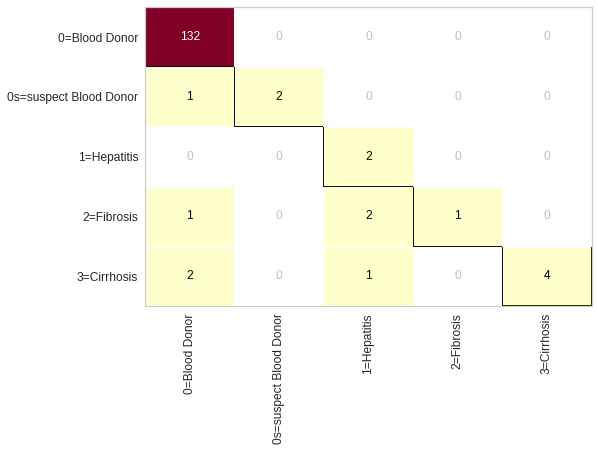

In [178]:
cm = ConfusionMatrix(RandomForestClassifier())
cm.fit(X_hepatite_treinamento, Y_hepatite_treinamento)
cm.score(X_hepatite_teste, Y_hepatite_teste)

## **KNN**

In [168]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_hepatite, Y_hepatite)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 5, 'p': 1}
0.9201796320440389


In [179]:
from yellowbrick.classifier import ConfusionMatrix

0.8918918918918919

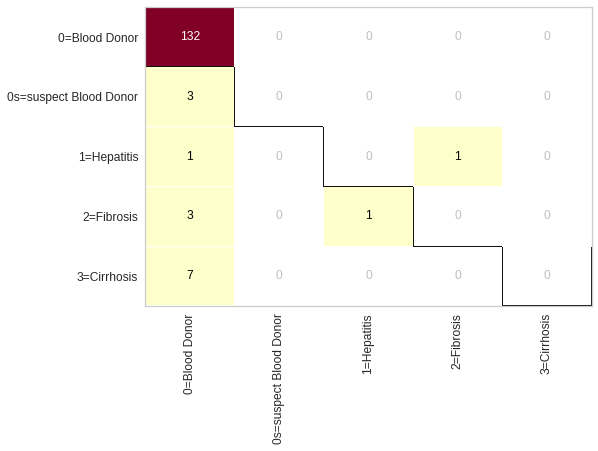

In [180]:
cm = ConfusionMatrix(KNeighborsClassifier())
cm.fit(X_hepatite_treinamento, Y_hepatite_treinamento)
cm.score(X_hepatite_teste, Y_hepatite_teste)

## **Logistic Regression**

In [169]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [170]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_hepatite, Y_hepatite)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001}
0.9270027524264812


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.9054054054054054

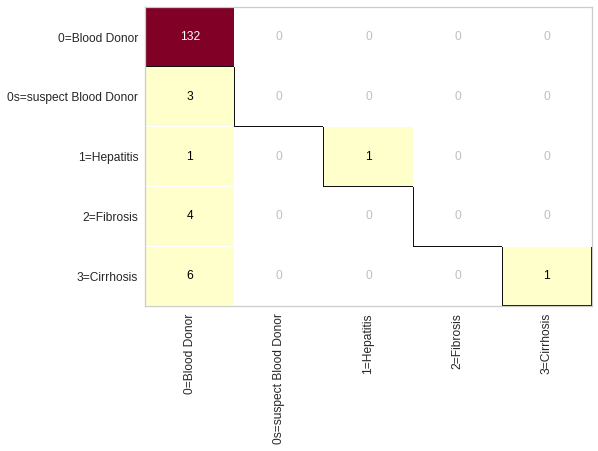

In [181]:
cm = ConfusionMatrix(LogisticRegression())
cm.fit(X_hepatite_treinamento, Y_hepatite_treinamento)
cm.score(X_hepatite_teste, Y_hepatite_teste)

# **SVC**

In [171]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [172]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_hepatite, Y_hepatite)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'kernel': 'poly', 'tol': 0.001}
0.940576560915544


0.9054054054054054

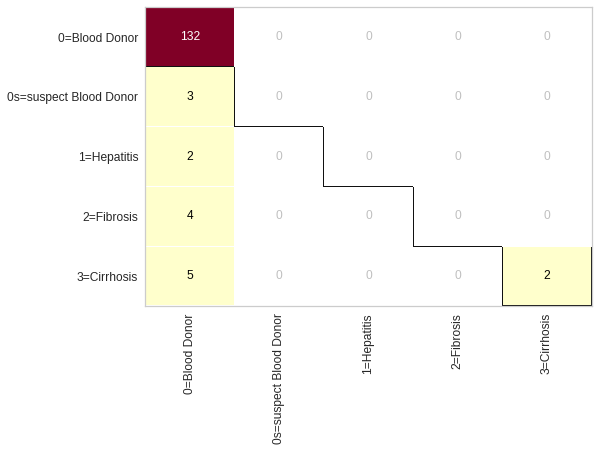

In [182]:
cm = ConfusionMatrix(SVC())
cm.fit(X_hepatite_treinamento, Y_hepatite_treinamento)
cm.score(X_hepatite_teste, Y_hepatite_teste)

## **Neural Networks**

In [173]:
parametros = {'activation': ['relu', 'logistic', 'identity'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [174]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_hepatite, Y_hepatite)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

{'activation': 'logistic', 'batch_size': 10, 'solver': 'adam'}
0.9490511371867305


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9391891891891891

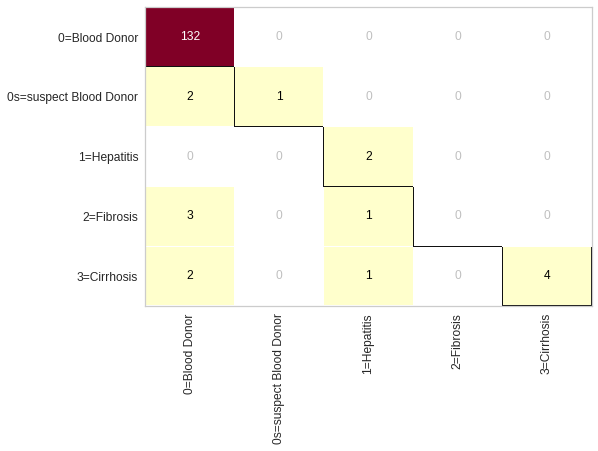

In [183]:
cm = ConfusionMatrix(MLPClassifier())
cm.fit(X_hepatite_treinamento, Y_hepatite_treinamento)
cm.score(X_hepatite_teste, Y_hepatite_teste)

## **Method comparison**

In [184]:
from sklearn.model_selection import cross_val_score, KFold

In [185]:
resultados_random_forest = []
resultados_rede_neural =[]

In [186]:
for i in range(20):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 10)
  scores = cross_val_score(random_forest, X_hepatite, Y_hepatite, cv = kfold)
  resultados_random_forest.append(scores.mean())

  rede_neural=MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
  scores = cross_val_score(rede_neural, X_hepatite, Y_hepatite, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

18


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [187]:
resultados = pd.DataFrame({'Random forest': resultados_random_forest,'RN':resultados_rede_neural})

In [188]:
resultados.describe()

,Random forest,RN
count,20.000000,20.000000
mean,0.939021,0.948619
std,0.006099,0.003103
min,0.921859,0.943980
25%,0.937127,0.945646
50%,0.938866,0.949021
75%,0.943936,0.950738
max,0.947428,0.954179


In [189]:
(resultados.std() / resultados.mean()) * 100

Random forest    0.649485
RN               0.327099
dtype: float64

In [190]:
with open('hepatite.pkl', 'rb') as f:
  X_hepatite_treinamento, X_hepatite_teste, Y_hepatite_treinamento, Y_hepatite_teste = pickle.load(f)

In [191]:
X_hepatite.shape

(589, 12)

In [192]:
Y_hepatite.shape

(589,)

In [193]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [194]:
classificador_rede_neural=MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
classificador_rede_neural.fit(X_hepatite, Y_hepatite)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(batch_size=56)

In [195]:
 classificador_random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 10)
 classificador_random_forest.fit(X_hepatite, Y_hepatite)

RandomForestClassifier(n_estimators=10)

## **Save the data**

In [196]:
import pickle


In [197]:
pickle.dump(random_forest, open('random_forest_final.sav', 'wb'))


In [198]:
pickle.dump(rede_neural, open('rede_neural_final.sav', 'wb'))